In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('DATA_RUMAH.csv')

In [3]:
dataset.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


In [4]:
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [5]:
print(x)

[[ 3800000000         220]
 [ 4600000000         180]
 [ 3000000000         267]
 ...
 [ 4000000000         139]
 [19000000000         360]
 [10500000000         420]]


In [6]:
print(y)

[0 2 4 ... 1 0 2]


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [8]:
print(x_train)

[[ 8000000000         260]
 [ 3000000000         267]
 [16500000000         800]
 ...
 [ 8900000000         300]
 [ 7500000000         350]
 [ 6500000000         300]]


In [9]:
len(x_train)

757

In [10]:
len(x)

1010

In [11]:
len(x_test)

253

In [12]:
len(y)

1010

In [13]:
len(y_test)

253

In [14]:
len(y_train)

757

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
print(x_train)

[[ 0.05174082 -0.09726854]
 [-0.65407408 -0.05722923]
 [ 1.25162615  2.99147781]
 ...
 [ 0.1787875   0.13152749]
 [-0.01884067  0.41752252]
 [-0.16000365  0.13152749]]


In [17]:
print(x_test)

[[-5.69376290e-01 -7.26457606e-01]
 [ 7.57414558e-01  7.03517555e-01]
 [-1.24712903e-01  4.17522523e-01]
 [-5.83492588e-01 -1.06965164e+00]
 [-9.80160562e-01 -1.06965164e+00]
 [-6.11725184e-01 -6.69258600e-01]
 [-4.28213310e-01 -5.54860587e-01]
 [-6.61132227e-01 -8.12256116e-01]
 [-5.83492588e-01 -3.83263567e-01]
 [-3.99980714e-01 -1.54467541e-01]
 [-5.41143694e-01 -7.26457606e-01]
 [-1.60003648e-01  1.31527491e-01]
 [ 2.16918552e+00  4.13545794e+00]
 [-2.16468840e-01  6.46318549e-01]
 [-1.88406684e-02  1.16110961e+00]
 [-8.94221584e-02  1.27550762e+00]
 [-2.02352542e-01 -9.72685350e-02]
 [-9.71690783e-01 -1.01245264e+00]
 [ 4.85128214e+00  3.27747285e+00]
 [-5.27027396e-01 -5.60580487e-01]
 [-4.70562204e-01 -5.54860587e-01]
 [-4.28213310e-01 -5.54860587e-01]
 [-2.30585138e-01 -7.26457606e-01]
 [-5.12911098e-01 -4.40462574e-01]
 [-5.12911098e-01 -3.48944163e-01]
 [-1.31771052e-01 -1.54467541e-01]
 [-5.34085545e-01 -6.69258600e-01]
 [-5.27027396e-01 -7.26457606e-01]
 [-1.60003648e-01 -3

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [20]:
y_pred = classifier.predict(x_test)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11 10  8  0  4  0  0  0  0  0  0]
 [ 2 33 19  1  2  1  0  0  0  0  0]
 [ 8 35 47  2  4  0  0  0  0  0  1]
 [ 2  9 11  4  3  0  0  0  0  0  0]
 [ 0  5  7  1  7  1  0  0  1  0  1]
 [ 1  1  2  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  0  0  0  0  1]
 [ 0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]]


C:\Users\acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its l

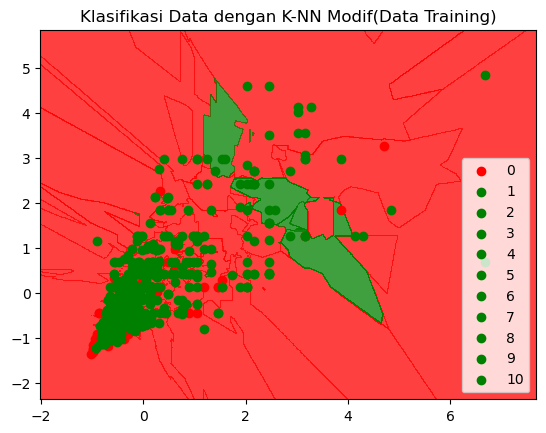

In [23]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop=x_set[:, 0].max()+1, step=0.01),
                     np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN Modif(Data Training)')
plt.legend()
plt.show()

C:\Users\acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its l

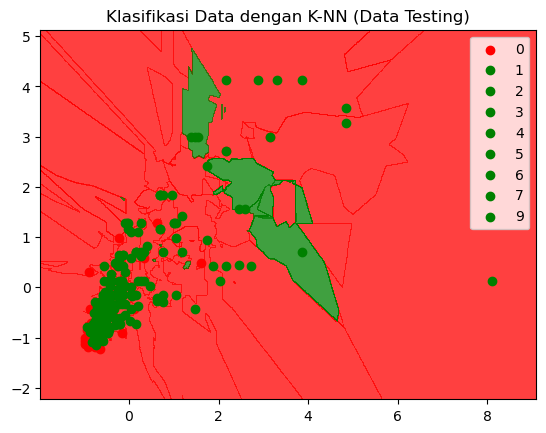

In [24]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop=x_set[:, 0].max()+1, step=0.01),
                     np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Testing)')
plt.legend()
plt.show()